# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

## 4.1 Simple Deep Q network

The algorithm in simple DQN has three steps:

Step 1 - in time t, the agent takes an action a_t in given current state s_t, then the agent gets a reward, denoted R_t+1, when it arrives to next state s_t+1.

Step 2 - In according to Q(s,a), we are able to pre-calculate the maximum Q-value in given state s_t+1 by considering all possible actions if can take. The discount factor gamma is for weighting the importance of maximum next-state Q-value. 

Step 3 - Combine step 1 and step 2, the estimated best Q(s,a) is completed. 

Loss = targeted_Q(s_t+1, a) - Local_Q(s_t, a_t)

where targeted_Q = R_t+1 + gamma * max(Q(s_t+1, a))

Then we want to minimize loss function using gradient descent. 

In [13]:
from collections import deque
from dqn_agent import Agent 
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
agent = Agent(state_size=37, action_size=4, update_type='dqn', seed=0) # select simple 'dqn' update targeted Q values mode

env_info = env.reset(train_mode=True)[brain_name]

state = env_info.vector_observations[0]
score = 0 

## 4.2. Train the agent with simple DQN

- Agent: defines how the learn, act, and update Q values functions
- Model: saved in model.py with two hidden layers. The hidden units in first and second hidden layers are all 64. 

In [11]:
from dqn_agent import Agent

In [35]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, saved_path='checkpoint.pth'):
    """Deep Q-learning.
    
    Params
    ======
        n_episodes (int): max number of training episodes
        max_t (int): max number of timestpes per episode
        eps_start (float): epsilon inital value
        eps_end (float): epsilon end value
        eps_decay (float): epsilon multiplicative factor for decreasing
    
    """
    scores = []                                    # list containing scores from each episode
    scores_window = deque(maxlen=100)              # last 100 scores
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state, reward, done=env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        #print ('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), saved_path)
            break
    return scores


    

In [36]:
env_info = env.reset(train_mode=True)[brain_name]
scores = dqn(n_episodes = 800, max_t=1000, saved_path='simple_dqn.pth')

Episode 100	Average Score: 0.33
Episode 200	Average Score: 1.79
Episode 300	Average Score: 6.38
Episode 400	Average Score: 9.62
Episode 500	Average Score: 12.27

Environment solved in 439 episodes!	Average Score: 13.01


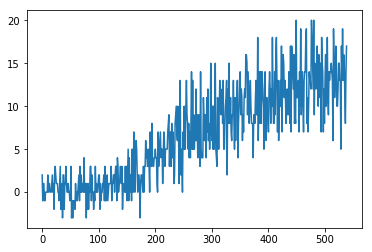

In [37]:
# print the scores

fig = plt.figure()
ax = plt.axes()

ax.plot(np.arange(len(scores)), scores);

In [38]:
import torch

In [39]:
agent.qnetwork_local.load_state_dict(torch.load('simple_dqn.pth'))

In [40]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 20.0


## 4.3 Double DQN

Double Q-Learning was proposed for solving the problem of large overestimation of action value (Q-value) in basic Q learning. 

In basic Q-learning the optimal policy of the agent is always to choose the best action in any given state. However, the agent knows nothing about the environment in the beginning, it needs to estimate Q(s,a) at first and update them at each iteration. Such Q values have lots of noises and we are never sure whether the action with maximum expected/estimated Q-value is really the best one. 

In double DQN algorithm, we changed the way to calculate Q_targets_next in learn function. Instead of feed next states to target dqn to get Q_targets_next, we calculate best actions using current states and local dqn. Then calculate Q(s_t+1, a). We select state values by using torch.gather() function to select values using best local actions. 

In [41]:
agent = Agent(state_size=37, action_size=4, update_type='double_dqn', seed=0) # select simple 'dqn' update targeted Q values mode
env_info = env.reset(train_mode=True)[brain_name]                      # reset the env
state = env_info.vector_observations[0]
score = 0 

In [42]:
env_info = env.reset(train_mode=True)[brain_name]
scores = dqn(n_episodes = 800, max_t=1000, saved_path='double_dqn.pth')

Episode 100	Average Score: 0.79
Episode 200	Average Score: 2.87
Episode 300	Average Score: 5.54
Episode 400	Average Score: 10.76
Episode 500	Average Score: 13.05

Environment solved in 400 episodes!	Average Score: 13.05


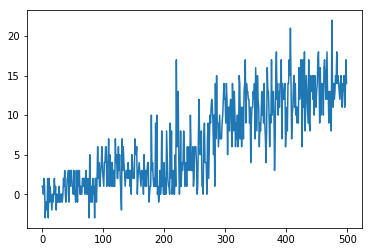

In [43]:
# print the scores

fig = plt.figure()
ax = plt.axes()

ax.plot(np.arange(len(scores)), scores);

In [44]:
agent.qnetwork_local.load_state_dict(torch.load('double_dqn.pth'))

In [45]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 5.0


In [46]:
env.close()